In [7]:
import re

<link href="style.css" rel="stylesheet"></link>

<article class="day-desc read-aloud"><h2>--- Day 21: Step Counter ---</h2><p>You manage to catch the <a href="7">airship</a> right as it's dropping someone else off on their all-expenses-paid trip to Desert Island! It even helpfully drops you off near the <a href="5">gardener</a> and his massive farm.</p>
<p>"You got the sand flowing again! Great work! Now we just need to wait until we have enough sand to filter the water for Snow Island and we'll have snow again in no time."</p>
<p>While you wait, one of the Elves that works with the gardener heard how good you are at solving problems and would like your help. He needs to get his <a href="https://en.wikipedia.org/wiki/Pedometer" target="_blank">steps</a> in for the day, and so he'd like to know <em>which garden plots he can reach with exactly his remaining <code>64</code> steps</em>.</p>
<p>He gives you an up-to-date map (your puzzle input) of his starting position (<code>S</code>), garden plots (<code>.</code>), and rocks (<code>#</code>). For example:</p>
<pre><code>...........
.....###.#.
.###.##..#.
..#.#...#..
....#.#....
.##..S####.
.##..#...#.
.......##..
.##.#.####.
.##..##.##.
...........
</code></pre>
<p>The Elf starts at the starting position (<code>S</code>) which also counts as a garden plot. Then, he can take one step north, south, east, or west, but only onto tiles that are garden plots. This would allow him to reach any of the tiles marked <code>O</code>:</p>
<pre><code>...........
.....###.#.
.###.##..#.
..#.#...#..
....#O#....
.##.OS####.
.##..#...#.
.......##..
.##.#.####.
.##..##.##.
...........
</code></pre>
<p>Then, he takes a second step. Since at this point he could be at <em>either</em> tile marked <code>O</code>, his second step would allow him to reach any garden plot that is one step north, south, east, or west of <em>any</em> tile that he could have reached after the first step:</p>
<pre><code>...........
.....###.#.
.###.##..#.
..#.#O..#..
....#.#....
.##O.O####.
.##.O#...#.
.......##..
.##.#.####.
.##..##.##.
...........
</code></pre>
<p>After two steps, he could be at any of the tiles marked <code>O</code> above, including the starting position (either by going north-then-south or by going west-then-east).</p>
<p>A single third step leads to even more possibilities:</p>
<pre><code>...........
.....###.#.
.###.##..#.
..#.#.O.#..
...O#O#....
.##.OS####.
.##O.#...#.
....O..##..
.##.#.####.
.##..##.##.
...........
</code></pre>
<p>He will continue like this until his steps for the day have been exhausted. After a total of <code>6</code> steps, he could reach any of the garden plots marked <code>O</code>:</p>
<pre><code>...........
.....###.#.
.###.##.O#.
.O#O#O.O#..
O.O.#.#.O..
.##O.O####.
.##.O#O..#.
.O.O.O.##..
.##.#.####.
.##O.##.##.
...........
</code></pre>
<p>In this example, if the Elf's goal was to get exactly <code>6</code> more steps today, he could use them to reach any of <code><em>16</em></code> garden plots.</p>
<p>However, the Elf <em>actually needs to get <code>64</code> steps today</em>, and the map he's handed you is much larger than the example map.</p>
<p>Starting from the garden plot marked <code>S</code> on your map, <em>how many garden plots could the Elf reach in exactly <code>64</code> steps?</em></p>
</article>


In [8]:
from enum import Enum, StrEnum

from pyparsing import deque


plot = """
...........
.....###.#.
.###.##..#.
..#.#...#..
....#.#....
.##..S####.
.##..#...#.
.......##..
.##.#.####.
.##..##.##.
...........
"""


class Position(StrEnum):
    S = "S"  # starting position
    G = "."  # garden plots (.)
    R = "#"  # rocks (#)

    def __format__(self, format_spec: str) -> str:
        return f"{self.name}"


class Direction(Enum):
    north = (-1, 0)
    south = (1, 0)
    east = (0, 1)
    west = (0, -1)

    def __format__(self, format_spec: str) -> str:
        return f"{self.name}"


class Garden:
    def __init__(self, plot: chr) -> None:
        self.s, self.garden = self.parse(plot)
        self.rows, self.cols = len(self.garden), len(self.garden[0])
        self.direction = tuple(d.value for d in Direction)

    def number_of_garden_plots_after_steps(self, n: int) -> int:
        return len(self.steps(n))

    def steps(self, n: int) -> list[int]:
        queue = deque([self.s])
        for _ in range(n):
            queue = self.step(queue)
        return queue

    def step(self, queue: deque[tuple[int, int]]) -> list[int]:
        for _ in range(len(queue)):
            r, c = queue.popleft()
            queue.extend(
                (r + rr, c + cc)
                for rr, cc in self.direction
                if 0 <= r + rr < self.rows
                and 0 <= c + cc < self.cols
                and (
                    self.garden[r + rr][c + cc] == Position.S
                    or self.garden[r + rr][c + cc] == Position.G
                )
            )
        return deque(set(queue))

    @classmethod
    def parse(cls, plot: str) -> tuple[tuple[int, int], list[list[Position]]]:
        garden = []
        s = -1, -1
        for row, line in enumerate(plot.strip().splitlines()):
            current_row = []
            for col, c in enumerate(line):
                current_row.append(c)
                if c == Position.S:
                    s = row, col
            garden.append(current_row)

        return s, garden

    def list_on_garden(self, positions: list[tuple[int, int]]) -> str:
        return "\n".join(
            "".join("O" if (r, c) in positions else ch for c, ch in enumerate(row))
            for r, row in enumerate(self.garden)
        )

    def __repr__(self) -> str:
        return self.__str__()

    def __str__(self) -> str:
        return "\n".join("".join(row) for row in self.garden)


g = Garden(plot)
step1 = g.step(deque([g.s]))
print(g.list_on_garden(step1))
print()
step2 = g.step(step1)
print(g.list_on_garden(step2))
print()
step3 = g.step(step2)
print(g.list_on_garden(step3))

print()
step6 = g.steps(6)
print(g.list_on_garden(step6))

print(Garden(plot).number_of_garden_plots_after_steps(6), 16)

...........
.....###.#.
.###.##..#.
..#.#...#..
....#O#....
.##.OS####.
.##..#...#.
.......##..
.##.#.####.
.##..##.##.
...........

...........
.....###.#.
.###.##..#.
..#.#O..#..
....#.#....
.##O.O####.
.##.O#...#.
.......##..
.##.#.####.
.##..##.##.
...........

...........
.....###.#.
.###.##..#.
..#.#.O.#..
...O#O#....
.##.OS####.
.##O.#...#.
....O..##..
.##.#.####.
.##..##.##.
...........

...........
.....###.#.
.###.##.O#.
.O#O#O.O#..
O.O.#.#.O..
.##O.O####.
.##.O#O..#.
.O.O.O.##..
.##.#.####.
.##O.##.##.
...........
16 16


In [9]:
with open("../input/day21.txt") as f:
    g = Garden(f.read())
    print(g.number_of_garden_plots_after_steps(64))

g

3733


...................................................................................................................................
.#...............#..#...........#....#................................................##......##..........#..............#.........
......#...................#...#..#..........#.#.......#.....................#.............##.....#....#......#..#........#.......#.
.#....#...#...#..#.................#.....#....#.#..#..........................#.....#...........#.............#....................
.#.............................##...##......#........#......................#.........##...#..#.................##.........#.#.....
....#.#....#.................#..#..#........#...#.#.#..#......................#........#....#..............#.....##................
....#.....#......#....#.##....#.##........#.....#......#........................#..........#.............#...................#.....
...........#...........##.#..........##.....#...#...##........#.............

<link href="style.css" rel="stylesheet"></link>
<main>

<p>Your puzzle answer was <code>3733</code>.</p><p class="day-success">The first half of this puzzle is complete! It provides one gold star: *</p>
<article class="day-desc"><h2 id="part2">--- Part Two ---</h2><p>The Elf seems confused by your answer until he realizes his mistake: he was reading from a <span title="Next up: 729.">list</span> of his favorite numbers that are both perfect squares and perfect cubes, not his step counter.</p>
<p>The <em>actual</em> number of steps he needs to get today is exactly <code><em>26501365</em></code>.</p>
<p>He also points out that the garden plots and rocks are set up so that the map <em>repeats infinitely</em> in every direction.</p>
<p>So, if you were to look one additional map-width or map-height out from the edge of the example map above, you would find that it keeps repeating:</p>
<pre><code>.................................
.....###.#......###.#......###.#.
.###.##..#..###.##..#..###.##..#.
..#.#...#....#.#...#....#.#...#..
....#.#........#.#........#.#....
.##...####..##...####..##...####.
.##..#...#..##..#...#..##..#...#.
.......##.........##.........##..
.##.#.####..##.#.####..##.#.####.
.##..##.##..##..##.##..##..##.##.
.................................
.................................
.....###.#......###.#......###.#.
.###.##..#..###.##..#..###.##..#.
..#.#...#....#.#...#....#.#...#..
....#.#........#.#........#.#....
.##...####..##..S####..##...####.
.##..#...#..##..#...#..##..#...#.
.......##.........##.........##..
.##.#.####..##.#.####..##.#.####.
.##..##.##..##..##.##..##..##.##.
.................................
.................................
.....###.#......###.#......###.#.
.###.##..#..###.##..#..###.##..#.
..#.#...#....#.#...#....#.#...#..
....#.#........#.#........#.#....
.##...####..##...####..##...####.
.##..#...#..##..#...#..##..#...#.
.......##.........##.........##..
.##.#.####..##.#.####..##.#.####.
.##..##.##..##..##.##..##..##.##.
.................................
</code></pre>
<p>This is just a tiny three-map-by-three-map slice of the inexplicably-infinite farm layout; garden plots and rocks repeat as far as you can see. The Elf still starts on the one middle tile marked <code>S</code>, though - every other repeated <code>S</code> is replaced with a normal garden plot (<code>.</code>).</p>
<p>Here are the number of reachable garden plots in this new infinite version of the example map for different numbers of steps:</p>
<ul>
<li>In exactly <code>6</code> steps, he can still reach <code><em>16</em></code> garden plots.</li>
<li>In exactly <code>10</code> steps, he can reach any of <code><em>50</em></code> garden plots.</li>
<li>In exactly <code>50</code> steps, he can reach <code><em>1594</em></code> garden plots.</li>
<li>In exactly <code>100</code> steps, he can reach <code><em>6536</em></code> garden plots.</li>
<li>In exactly <code>500</code> steps, he can reach <code><em>167004</em></code> garden plots.</li>
<li>In exactly <code>1000</code> steps, he can reach <code><em>668697</em></code> garden plots.</li>
<li>In exactly <code>5000</code> steps, he can reach <code><em>16733044</em></code> garden plots.</li>
</ul>
<p>However, the step count the Elf needs is much larger! Starting from the garden plot marked <code>S</code> on your infinite map, <em>how many garden plots could the Elf reach in exactly <code>26501365</code> steps?</em></p>
</article>

</main>


In [10]:
from typing import override


class GardenII(Garden):
    @override
    def step(self, queue: deque[tuple[int, int]]) -> list[int]:
        for _ in range(len(queue)):
            r, c = queue.popleft()
            queue.extend(
                (r + rr, c + cc)
                for rr, cc in self.direction
                if (
                    self.garden[(r + rr) % self.rows][(c + cc) % self.cols]
                    == Position.S
                    or self.garden[(r + rr) % self.rows][(c + cc) % self.cols]
                    == Position.G
                )
            )
        return deque(set(queue))


# In exactly 6 steps, he can still reach 16 garden plots.
assert GardenII(plot).number_of_garden_plots_after_steps(6) == 16
# In exactly 10 steps, he can reach any of 50 garden plots.
assert GardenII(plot).number_of_garden_plots_after_steps(10) == 50
# In exactly 50 steps, he can reach 1594 garden plots.
assert GardenII(plot).number_of_garden_plots_after_steps(50) == 1594
# In exactly 100 steps, he can reach 6536 garden plots.
# assert GardenII(plot).number_of_garden_plots_after_steps(100) == 6536
# In exactly 500 steps, he can reach 167004 garden plots.
# assert GardenII(plot).number_of_garden_plots_after_steps(500) == 167004
# In exactly 1000 steps, he can reach 668697 garden plots.
# assert GardenII(plot).number_of_garden_plots_after_steps(1_000) == 668697
# In exactly 5000 steps, he can reach 16733044 garden plots.
# assert GardenII(plot).number_of_garden_plots_after_steps(5_000) == 16733044

[   65.86159546 -1064.8900743 ]
328243.0872027572 16733044


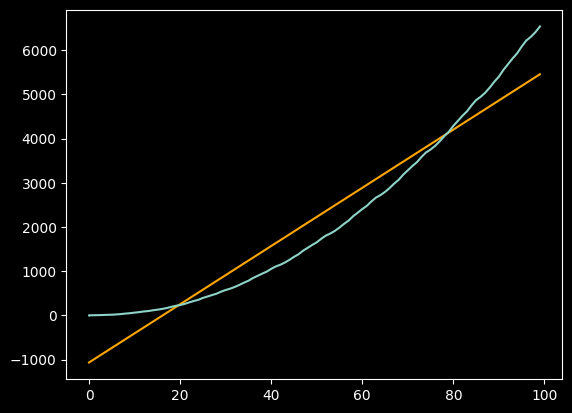

In [11]:
import matplotlib.pyplot as plt
import numpy as np

g2 = GardenII(plot)
queue = deque([g2.s])
steps = [(0, 1)] + [(n, len(queue := g2.step(queue))) for n in range(100)]

d = 1
xs = np.array([x for x, _ in steps])
ys = np.array([y for _, y in steps])
trend = np.polyfit(xs, ys, d)
trendpoly = np.polyval(trend, xs)
plt.plot(xs, trendpoly, color="orange")
plt.plot(xs, ys)
print(trend)
x = 5_000
print(sum(v * x**i for i, v in enumerate(trend[::-1])), 16733044)

In [12]:
import numpy as np
from scipy.optimize import minimize

steps = [
    (6, 16),
    (10, 50),
    (50, 1595),
    (100, 6536),
    (500, 167004),
    (1000, 668697),
    (5000, 16733044),
]

[6536 / 50, 668697 / 6536], [167004 / 1595, 16733044 / 167004]

([130.72, 102.30982252141983], [104.70470219435737, 100.19546837201504])

https://www.reddit.com/r/adventofcode/comments/18orn0s/2023_day_21_part_2_links_between_days/
I've been noticing some similarities between the later puzzles and earlier ones. The later puzzles seem to be an extension to an idea / solution from an earlier day.

With Day 21 part 2, I've seen quite a few solutions where people noticed that 26501365 = 202300 _ 131 + 65 (where 131 was the size of the map), used their part 1 solution to find the number of plots at 65, 65 + 131, 65 + 2 _ 131 steps etc, and then fitted a polynomial to the number of steps.

What I find a bit suspicious is that in Day 9 the problem essentially is "here's a sequence of numbers, predict the next one". And mathematically, it's essentially finding the next value in a sequence described by a polynomial.

Which means that for Day 21, you can just use your Day 9 (part 1) code to find the next values in the sequence!

For example, in my input, I found that:

65 steps: 3703 plots
196 steps: 32957 plots
327 steps: 91379 plots
458 steps: 178969 plots
589 steps: 295727 plots


In [13]:
# with open("../input/day21.txt") as f:
#     g2 = GardenII(f.read())

# queue = deque([g2.s])
# steps = [1] + [len(queue := g2.step(queue)) for n in range(600)]

# [steps[i] for i in [65, 196, 327, 458, 589]]

In [14]:
# def extrapolate(history):
#     h = [history]
#     while any(v != 0 for v in h[-1]):
#         h.append([h[-1][i] - h[-1][i - 1] for i in range(1, len(h[-1]))])

#     for i in range(len(h) - 2, -1, -1):
#         h[i - 1].append(h[i][-1] + h[i - 1][-1])
#     return h[0][-1]


# extrapolate([steps[i] for i in [65, 196, 327, 458, 589]])

<link href="style.css" rel="stylesheet"></link>


In [15]:
# copied from https://youtu.be/9UOMZSL0JTg
from collections import deque

grid = open("../input/day21.txt").read().splitlines()

sr, sc = next(
    (r, c) for r, row in enumerate(grid) for c, ch in enumerate(row) if ch == "S"
)

assert len(grid) == len(grid[0])

size = len(grid)
steps = 26501365

assert sr == sc == size // 2
assert steps % size == size // 2


def fill(sr, sc, ss):
    ans = set()
    seen = {(sr, sc)}
    q = deque([(sr, sc, ss)])

    while q:
        r, c, s = q.popleft()

        if s % 2 == 0:
            ans.add((r, c))
        if s == 0:
            continue

        for nr, nc in [(r + 1, c), (r - 1, c), (r, c + 1), (r, c - 1)]:
            if (
                nr < 0
                or nr >= len(grid)
                or nc < 0
                or nc >= len(grid[0])
                or grid[nr][nc] == "#"
                or (nr, nc) in seen
            ):
                continue
            seen.add((nr, nc))
            q.append((nr, nc, s - 1))

    return len(ans)


grid_width = steps // size - 1

odd = (grid_width // 2 * 2 + 1) ** 2
even = ((grid_width + 1) // 2 * 2) ** 2

odd_points = fill(sr, sc, size * 2 + 1)
even_points = fill(sr, sc, size * 2)

corner_t = fill(size - 1, sc, size - 1)
corner_r = fill(sr, 0, size - 1)
corner_b = fill(0, sc, size - 1)
corner_l = fill(sr, size - 1, size - 1)

small_tr = fill(size - 1, 0, size // 2 - 1)
small_tl = fill(size - 1, size - 1, size // 2 - 1)
small_br = fill(0, 0, size // 2 - 1)
small_bl = fill(0, size - 1, size // 2 - 1)

large_tr = fill(size - 1, 0, size * 3 // 2 - 1)
large_tl = fill(size - 1, size - 1, size * 3 // 2 - 1)
large_br = fill(0, 0, size * 3 // 2 - 1)
large_bl = fill(0, size - 1, size * 3 // 2 - 1)

print(
    odd * odd_points
    + even * even_points
    + corner_t
    + corner_r
    + corner_b
    + corner_l
    + (grid_width + 1) * (small_tr + small_tl + small_br + small_bl)
    + grid_width * (large_tr + large_tl + large_br + large_bl)
)

617729401414635


<link href="style.css" rel="stylesheet"></link>

<main>

<p>Your puzzle answer was <code>617729401414635</code>.</p><p class="day-success">Both parts of this puzzle are complete! They provide two gold stars: **</p>
<p>At this point, you should <a href="/2023">return to your Advent calendar</a> and try another puzzle.</p>
<p>If you still want to see it, you can <a href="21/input" target="_blank">get your puzzle input</a>.</p>
<p>You can also <span class="share">[Share<span class="share-content">on
  <a href="https://twitter.com/intent/tweet?text=I%27ve+completed+%22Step+Counter%22+%2D+Day+21+%2D+Advent+of+Code+2023&amp;url=https%3A%2F%2Fadventofcode%2Ecom%2F2023%2Fday%2F21&amp;related=ericwastl&amp;hashtags=AdventOfCode" target="_blank">Twitter</a>
  <a href="javascript:void(0);" onclick="var ms; try{ms=localStorage.getItem('mastodon.server')}finally{} if(typeof ms!=='string')ms=''; ms=prompt('Mastodon Server?',ms); if(typeof ms==='string' &amp;&amp; ms.length){this.href='https://'+ms+'/share?text=I%27ve+completed+%22Step+Counter%22+%2D+Day+21+%2D+Advent+of+Code+2023+%23AdventOfCode+https%3A%2F%2Fadventofcode%2Ecom%2F2023%2Fday%2F21';try{localStorage.setItem('mastodon.server',ms);}finally{}}else{return false;}" target="_blank">Mastodon</a></span>]</span> this puzzle.</p>
</main>
